In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

In [114]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(digits.data[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)


In [115]:
Xmatrix = digits.data
meanVector = np.mean(Xmatrix,axis = 0)
CenteredXmatrix = Xmatrix - meanVector
SdVector = np.std(CenteredXmatrix.astype(float),axis = 0)
#CenteredXmatrix /= SdVector
covOfCenteredXmatrix = np.array([(CenteredXmatrix[0,:].astype(float))]).T@ np.array([(CenteredXmatrix[0,:].astype(float))])
for i in range(1,len(CenteredXmatrix)):
    covOfCenteredXmatrix +=   np.array([(CenteredXmatrix[i,:].astype(float))]).T@ np.array([(CenteredXmatrix[i,:].astype(float))])
covOfCenteredXmatrix /= len(CenteredXmatrix)
eigenValues, eigenVectors = np.linalg.eig(covOfCenteredXmatrix)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
neededEigenVectors = []
for idx, val in enumerate(eigenValues):
    if (sum(eigenValues[0:idx])/sum(eigenValues))>0.9:
        neededEigenVectors = eigenVectors[:,0:idx]
        break
reconstructedXmatrix = CenteredXmatrix.astype(float)@neededEigenVectors

In [116]:
reconstructedXmatrix.shape

(1797, 21)

best bandwidth is 3.79269019073225


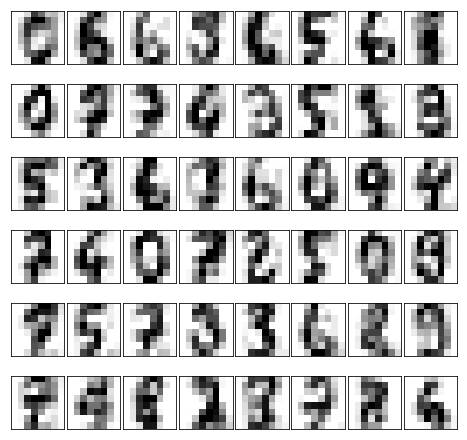

In [117]:
grid = GridSearchCV(KernelDensity(), {'bandwidth': np.logspace(-1, 1, 20)},cv = 4)
grid.fit(reconstructedXmatrix)

print("best bandwidth is "+str(grid.best_estimator_.bandwidth))

kde = grid.best_estimator_
new_data = kde.sample(48)
newFullData = (new_data@neededEigenVectors.T)+meanVector
fig, ax = plt.subplots(6, 8, figsize=(8, 8),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(newFullData[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)

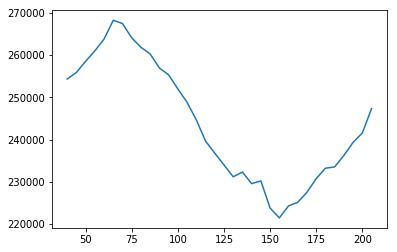

In [118]:
n_components = np.arange(40, 210, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
bics = [model.fit(reconstructedXmatrix).bic(reconstructedXmatrix) for model in models]
plt.plot(n_components, bics);

In [119]:
gmm = GaussianMixture(151, covariance_type='full', random_state=0)
gmm.fit(reconstructedXmatrix)
print(gmm.converged_)

True


In [120]:
newReducedData = gmm.sample(48)

In [121]:
newFullData = (newReducedData[0]@neededEigenVectors.T)+meanVector

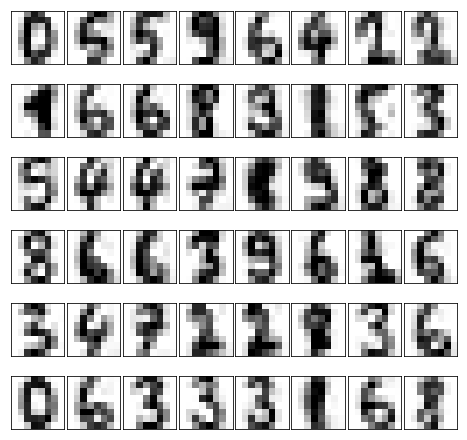

In [122]:
fig, ax = plt.subplots(6, 8, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(newFullData[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)

In [123]:
Xmatrix = digits.data
meanVector = np.mean(Xmatrix,axis = 0)
CenteredXmatrix = Xmatrix - meanVector
SdVector = np.std(CenteredXmatrix.astype(float),axis = 0)
#CenteredXmatrix /= SdVector
covOfCenteredXmatrix = np.array([(CenteredXmatrix[0,:].astype(float))]).T@ np.array([(CenteredXmatrix[0,:].astype(float))])
for i in range(1,len(CenteredXmatrix)):
    covOfCenteredXmatrix +=   np.array([(CenteredXmatrix[i,:].astype(float))]).T@ np.array([(CenteredXmatrix[i,:].astype(float))])
covOfCenteredXmatrix /= len(CenteredXmatrix)
eigenValues, eigenVectors = np.linalg.eig(covOfCenteredXmatrix)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
neededEigenVectors = []
for idx, val in enumerate(eigenValues):
    if (sum(eigenValues[0:idx])/sum(eigenValues))>0.95:
        neededEigenVectors = eigenVectors[:,0:idx]
        break
reconstructedXmatrix = CenteredXmatrix.astype(float)@neededEigenVectors

In [124]:
reconstructedXmatrix.shape

(1797, 29)

best bandwidth is 2.9763514416313175


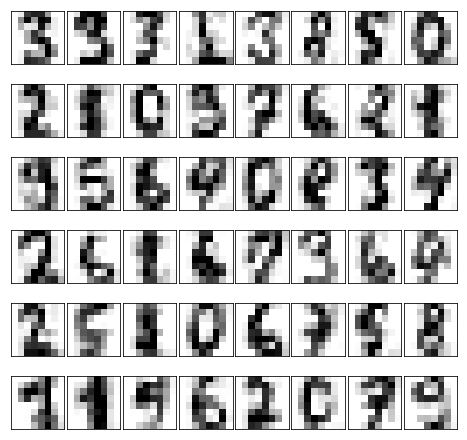

In [125]:
grid = GridSearchCV(KernelDensity(), {'bandwidth': np.logspace(-1, 1, 20)},cv = 4)
grid.fit(reconstructedXmatrix)

print("best bandwidth is "+str(grid.best_estimator_.bandwidth))

kde = grid.best_estimator_
new_data = kde.sample(48)
newFullData = (new_data@neededEigenVectors.T)+meanVector
fig, ax = plt.subplots(6, 8, figsize=(8, 8),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(newFullData[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)

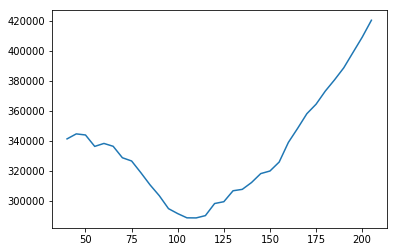

In [126]:
n_components = np.arange(40, 210, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
bics = [model.fit(reconstructedXmatrix).bic(reconstructedXmatrix) for model in models]
plt.plot(n_components, bics);

In [127]:
gmm = GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(reconstructedXmatrix)
print(gmm.converged_)

True


In [128]:
newReducedData = gmm.sample(48)

In [129]:
newFullData = (newReducedData[0]@neededEigenVectors.T)+meanVector

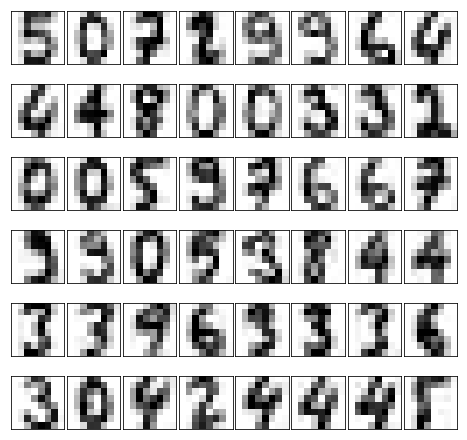

In [130]:
fig, ax = plt.subplots(6, 8, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(newFullData[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)

In [131]:
Xmatrix = digits.data
meanVector = np.mean(Xmatrix,axis = 0)
CenteredXmatrix = Xmatrix - meanVector
SdVector = np.std(CenteredXmatrix.astype(float),axis = 0)
#CenteredXmatrix /= SdVector
covOfCenteredXmatrix = np.array([(CenteredXmatrix[0,:].astype(float))]).T@ np.array([(CenteredXmatrix[0,:].astype(float))])
for i in range(1,len(CenteredXmatrix)):
    covOfCenteredXmatrix +=   np.array([(CenteredXmatrix[i,:].astype(float))]).T@ np.array([(CenteredXmatrix[i,:].astype(float))])
covOfCenteredXmatrix /= len(CenteredXmatrix)
eigenValues, eigenVectors = np.linalg.eig(covOfCenteredXmatrix)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
neededEigenVectors = []
for idx, val in enumerate(eigenValues):
    if (sum(eigenValues[0:idx])/sum(eigenValues))>0.99:
        neededEigenVectors = eigenVectors[:,0:idx]
        break
reconstructedXmatrix = CenteredXmatrix.astype(float)@neededEigenVectors

In [132]:
reconstructedXmatrix.shape

(1797, 41)

best bandwidth is 2.9763514416313175


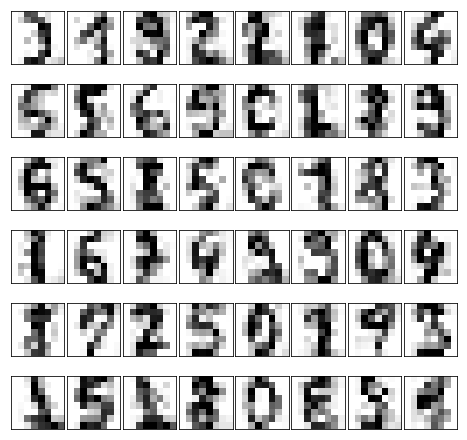

In [133]:
grid = GridSearchCV(KernelDensity(), {'bandwidth': np.logspace(-1, 1, 20)},cv = 4)
grid.fit(reconstructedXmatrix)

print("best bandwidth is "+str(grid.best_estimator_.bandwidth))

kde = grid.best_estimator_
new_data = kde.sample(48)
newFullData = (new_data@neededEigenVectors.T)+meanVector
fig, ax = plt.subplots(6, 8, figsize=(8, 8),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(newFullData[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)

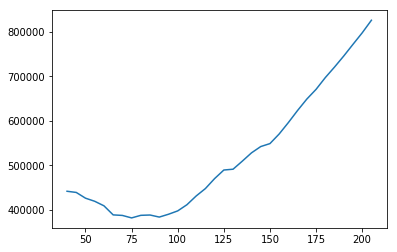

In [134]:
n_components = np.arange(40, 210, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
bics = [model.fit(reconstructedXmatrix).bic(reconstructedXmatrix) for model in models]
plt.plot(n_components, bics);

In [135]:
gmm = GaussianMixture(75, covariance_type='full', random_state=0)
gmm.fit(reconstructedXmatrix)
print(gmm.converged_)

True


In [136]:
newReducedData = gmm.sample(48)

In [137]:
newFullData = (newReducedData[0]@neededEigenVectors.T)+meanVector

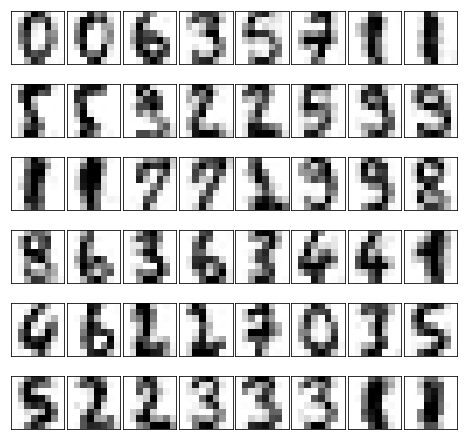

In [138]:
fig, ax = plt.subplots(6, 8, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i, axi in enumerate(ax.flat):
    im = axi.imshow(newFullData[i].reshape(8, 8), cmap='binary')
    im.set_clim(0, 16)